# CLUSTERING ANALYSIS 

## Understanding and Implementing K-Means, Hierarchical, and DBSCAN Algorithms

Data Preprocessing:
1.	Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.

In [30]:
import pandas as pd
import numpy as np
df = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [31]:
df.shape

(3999, 12)

In [32]:
df.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

Missing Values
- After checking df.isnull().sum(), no missing values were found (if any exist, mention the count and how you’d handle them).

In [33]:
df.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [34]:
df_col = df.columns.to_list()
df_col

['ID#',
 'Balance',
 'Qual_miles',
 'cc1_miles',
 'cc2_miles',
 'cc3_miles',
 'Bonus_miles',
 'Bonus_trans',
 'Flight_miles_12mo',
 'Flight_trans_12',
 'Days_since_enroll',
 'Award?']

In [35]:
# finding outliers

for i,col in enumerate(df_col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    Outliers_col = df[col][(df[col]>upper) | (df[col]<lower)]
    print(f"The Total no. of outliers in {col} : ",len(Outliers_col))

    # Handling Outliers
    df[col] = np.where(df[col]>upper,upper, np.where(df[col]<lower,lower,df[col]))
    
print(df.shape)



The Total no. of outliers in ID# :  0
The Total no. of outliers in Balance :  266
The Total no. of outliers in Qual_miles :  226
The Total no. of outliers in cc1_miles :  0
The Total no. of outliers in cc2_miles :  43
The Total no. of outliers in cc3_miles :  18
The Total no. of outliers in Bonus_miles :  280
The Total no. of outliers in Bonus_trans :  63
The Total no. of outliers in Flight_miles_12mo :  569
The Total no. of outliers in Flight_trans_12 :  565
The Total no. of outliers in Days_since_enroll :  0
The Total no. of outliers in Award? :  0
(3999, 12)


In [36]:
for i,col in enumerate(df_col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    Outliers_col = df[col][(df[col]>upper) | (df[col]<lower)]
    print(f"The Total no. of outliers in {col} : ",len(Outliers_col))

    # Handling Outliers
    df[col] = np.where(df[col]>upper,upper, np.where(df[col]<lower,lower,df[col]))

The Total no. of outliers in ID# :  0
The Total no. of outliers in Balance :  0
The Total no. of outliers in Qual_miles :  0
The Total no. of outliers in cc1_miles :  0
The Total no. of outliers in cc2_miles :  0
The Total no. of outliers in cc3_miles :  0
The Total no. of outliers in Bonus_miles :  0
The Total no. of outliers in Bonus_trans :  0
The Total no. of outliers in Flight_miles_12mo :  0
The Total no. of outliers in Flight_trans_12 :  0
The Total no. of outliers in Days_since_enroll :  0
The Total no. of outliers in Award? :  0


In [37]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
df_scaled = pd.DataFrame(trans.fit_transform(df),columns=df_col)
df_scaled

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.000000,0.138486,0.0,0.00,0.0,0.0,0.003019,0.026316,0.000000,0.0,0.843742,0.0
1,0.000249,0.094696,0.0,0.00,0.0,0.0,0.003731,0.052632,0.000000,0.0,0.839884,0.0
2,0.000498,0.203495,0.0,0.00,0.0,0.0,0.071547,0.105263,0.000000,0.0,0.847842,0.0
3,0.000746,0.072710,0.0,0.00,0.0,0.0,0.008677,0.026316,0.000000,0.0,0.837955,0.0
4,0.000995,0.481019,0.0,0.75,0.0,0.0,0.751394,0.684211,1.000000,1.0,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.999005,0.090917,0.0,0.00,0.0,0.0,0.147936,0.105263,0.257235,0.4,0.168917,1.0
3995,0.999254,0.316826,0.0,0.00,0.0,0.0,0.017023,0.131579,0.000000,0.0,0.167953,1.0
3996,0.999502,0.362157,0.0,0.50,0.0,0.0,0.441587,0.210526,0.000000,0.0,0.168797,1.0
3997,0.999751,0.270147,0.0,0.00,0.0,0.0,0.008677,0.026316,0.643087,0.4,0.168676,0.0


2.	Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.

In [38]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3999.000000,3999.0,3999.000000,3999.0,3999.0,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,63768.635784,0.0,2.059515,1.0,1.0,15410.730683,11.470618,178.055639,0.591523,4118.55939,0.370343
std,1160.764358,58673.700736,0.0,1.376919,0.0,0.0,18074.733482,9.115104,294.678028,0.944826,2065.13454,0.482957
min,1.000000,0.000000,0.0,1.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,18527.500000,0.0,1.000000,1.0,1.0,1250.000000,3.000000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,43097.000000,0.0,1.000000,1.0,1.0,7171.000000,12.000000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,92404.000000,0.0,3.000000,1.0,1.0,23800.500000,17.000000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,203218.750000,0.0,5.000000,1.0,1.0,57626.250000,38.000000,777.500000,2.500000,8296.00000,1.000000


Columns like Qual_miles, cc2_miles, and cc3_miles show zero standard deviation or constant values → meaning no variation across the dataset.
- These columns don’t add any new information and can be dropped before modeling

In [39]:
df_scaled = df_scaled.drop(['Qual_miles', 'cc2_miles', 'cc3_miles'], axis=1)

In [40]:
# All columns are numeric, except possibly 'ID#' which is an identifier
df_scaled = df_scaled.drop(['ID#'], axis=1)
df_scaled
df_scaled_col = df_scaled.columns.to_list()

3.	Use multiple visualizations to understand the hidden patterns in the dataset

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

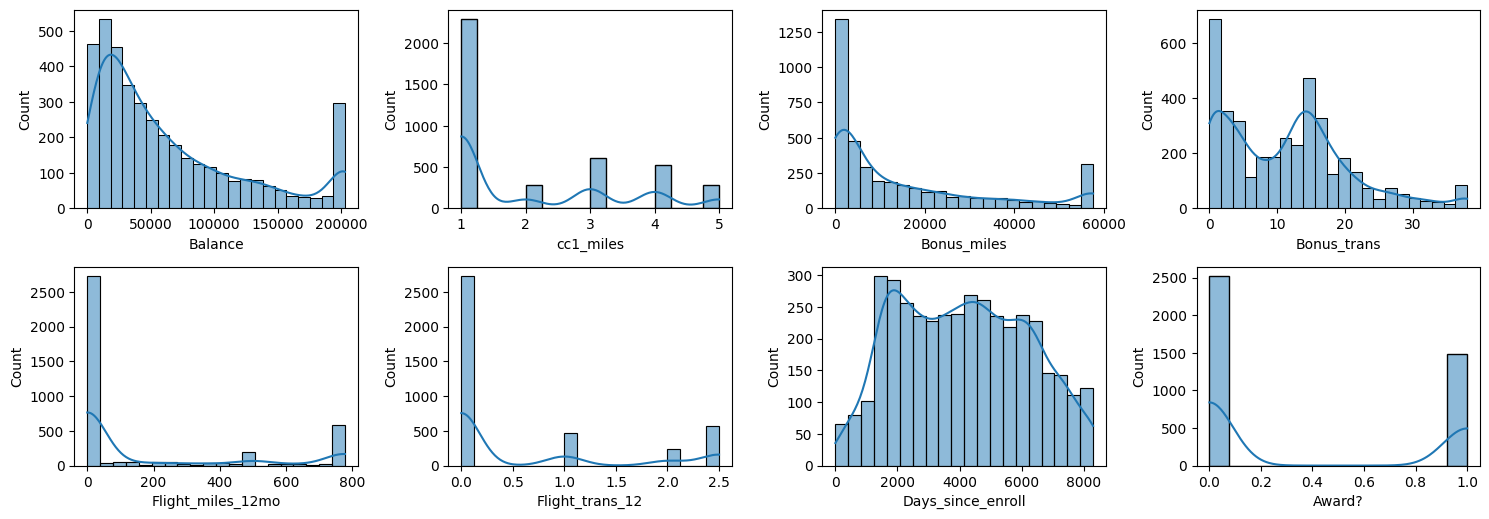

In [42]:
# Histogram
plt.figure(figsize=(15,10))
for i,col in enumerate(df_scaled_col):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col],kde=True)
plt.tight_layout()
plt.show()

- Most customers have low flight activity (Flight_miles_12mo, Flight_trans_12 skewed toward 0).
- Balance, Bonus_miles, and Days_since_enroll are right-skewed, showing few customers with very high values.

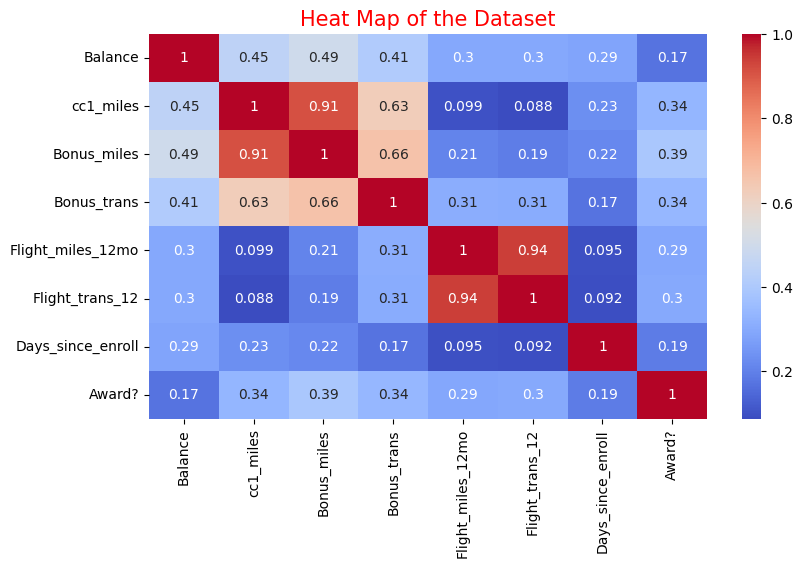

In [43]:
# Heat Map

plt.figure(figsize=(9,5))
sns.heatmap(df_scaled.corr(),annot=True,cmap='coolwarm')
plt.title('Heat Map of the Dataset',color='red',size=15)
plt.show()

- Bonus_miles and Bonus_trans show a strong positive correlation, indicating that customers earning more bonus miles also perform more transactions.
- Features like Balance and Days_since_enroll have moderate correlation, meaning long-time customers tend to have higher balances.

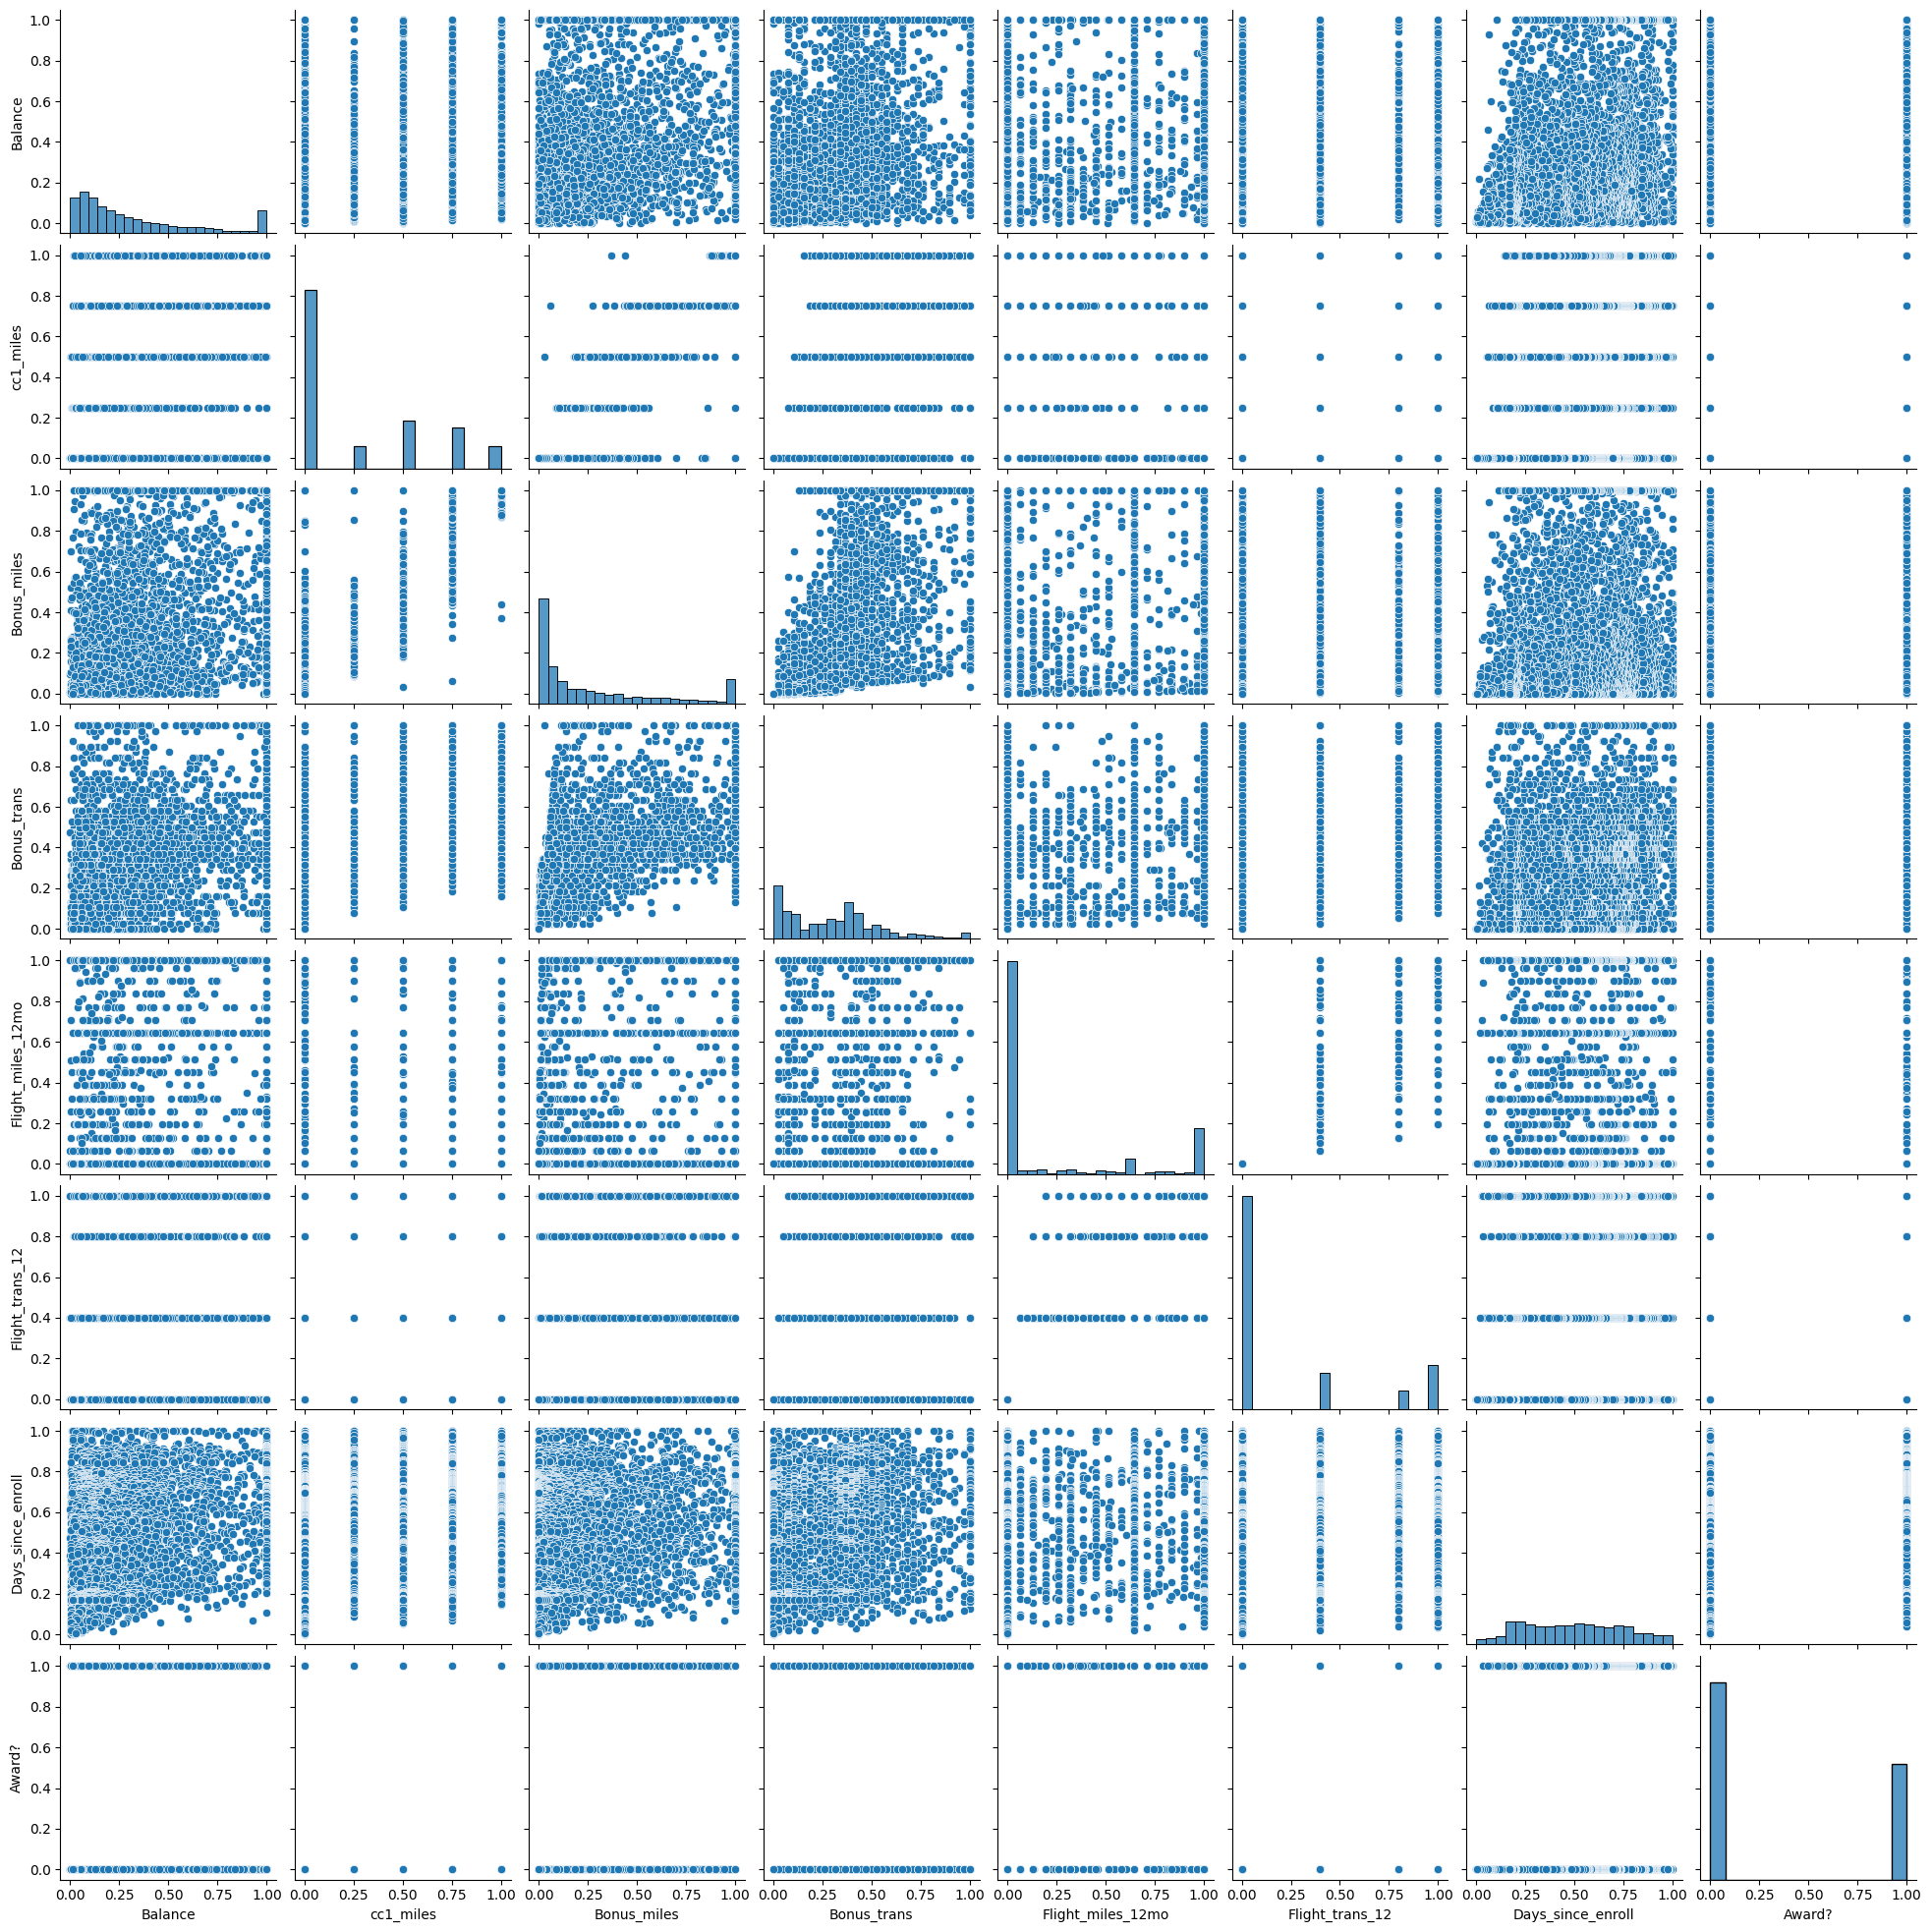

In [44]:
# Pair plot

sns.pairplot(df_scaled)
plt.show()

- Some variables form distinct groups visually, suggesting potential cluster separation, especially between Balance and Days_since_enroll.
- Clear linear relationships appear between Bonus_miles and Bonus_trans, confirming what the heatmap indicated.

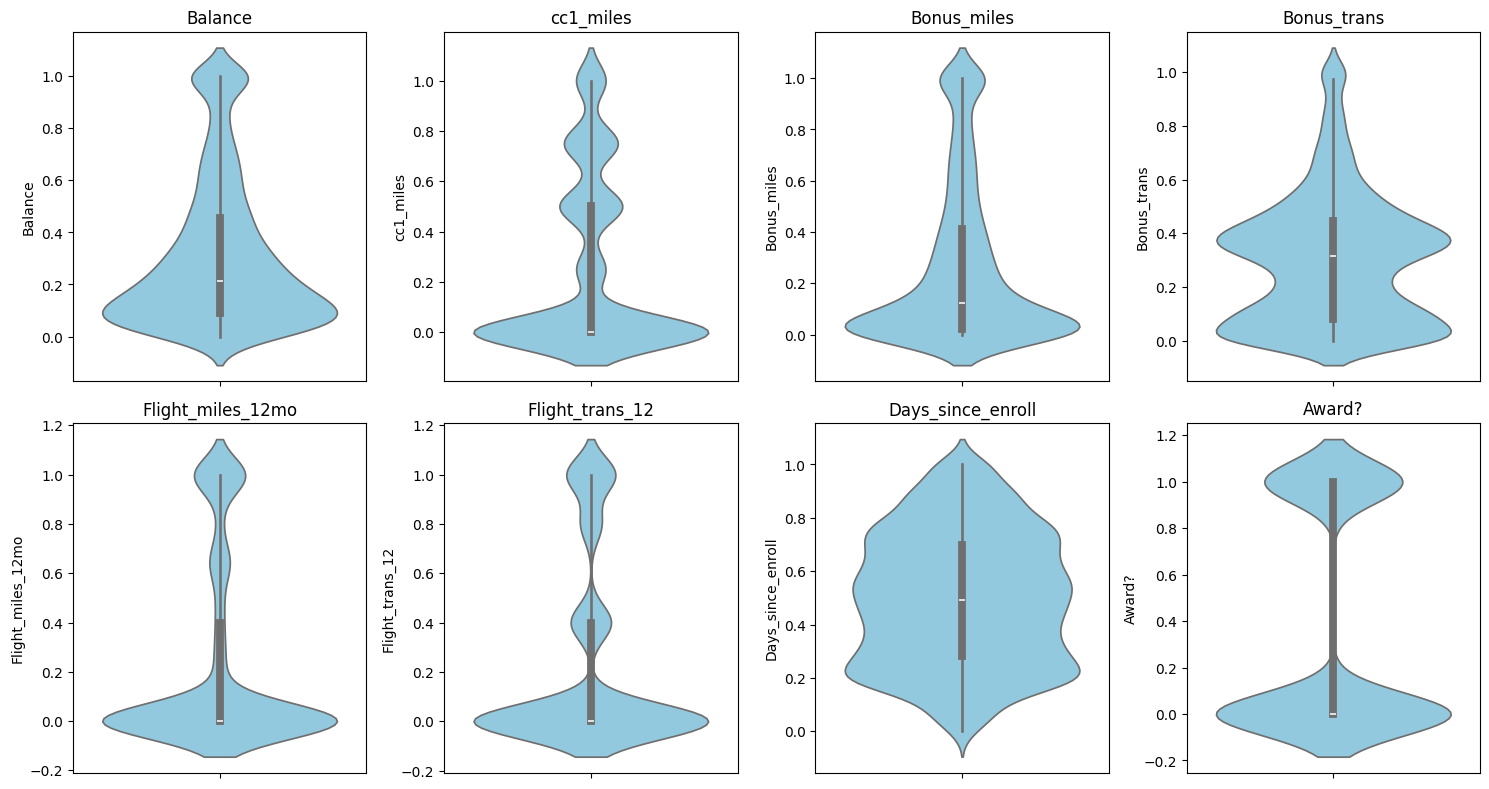

In [45]:
# Violin Plot
plt.figure(figsize=(15,8))
for i, col in enumerate(df_scaled.columns[:8]):  # first 8 features for clarity
    plt.subplot(2,4,i+1)
    sns.violinplot(y=df_scaled[col], color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()


- Balance and Bonus_miles have highly skewed distributions, with most customers clustered in lower value ranges.
- Days_since_enroll shows multiple dense regions, indicating customers with varying loyalty durations (possible natural segments).

# Implementing Clustering Algorithms
-	Implement the K-Means, hierarchical, and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn or MATLAB.
-	Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.
-	Experiment with different parameter settings for hierarchical clustering (e.g., linkage criteria), K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.


# Hierarchical Clustering

### Hierarchical With Ward linkage

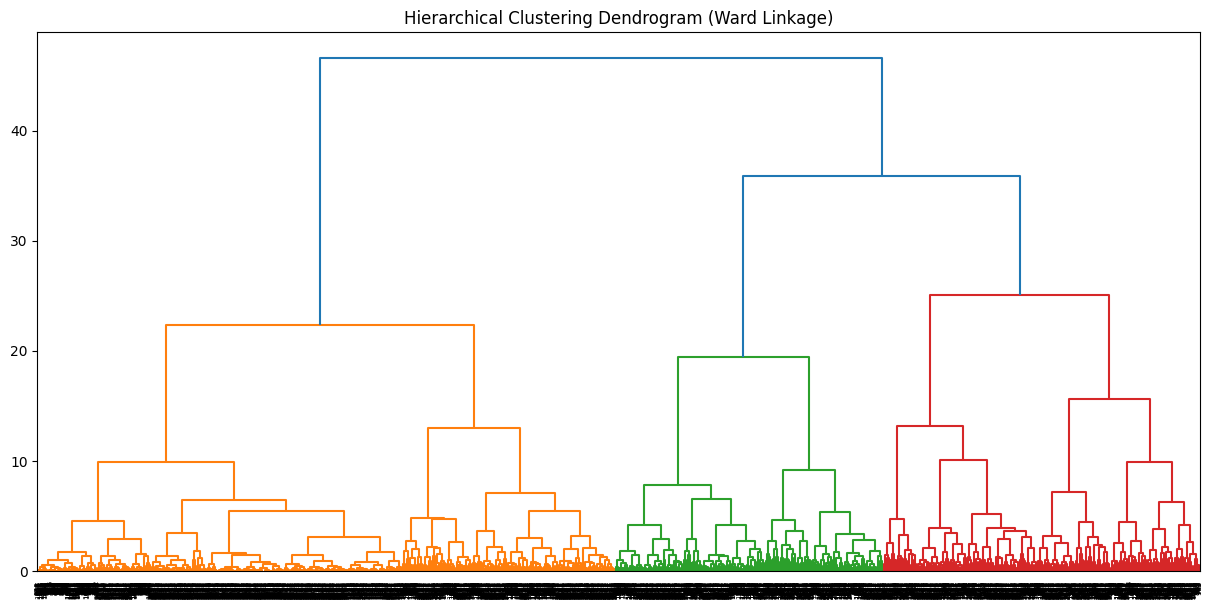

In [46]:
from scipy.cluster.hierarchy import linkage,dendrogram
# With method='ward'
plt.figure(figsize=(15,7))
link = linkage(df_scaled,metric='euclidean',method='ward')
plt.title("Hierarchical Clustering Dendrogram (Ward Linkage)")
dendrogram(link,leaf_rotation=90)
plt.show()

In [47]:
from sklearn.cluster import AgglomerativeClustering

Hierarchical_ward = AgglomerativeClustering(n_clusters=3,linkage='ward').fit(df_scaled)
Hierarchical_ward_clusters = pd.Series(Hierarchical_ward.labels_)
Hierarchical_ward_clusters

0       1
1       1
2       1
3       1
4       0
       ..
3994    0
3995    2
3996    2
3997    0
3998    1
Length: 3999, dtype: int64

### Hierarchical With Average linkage

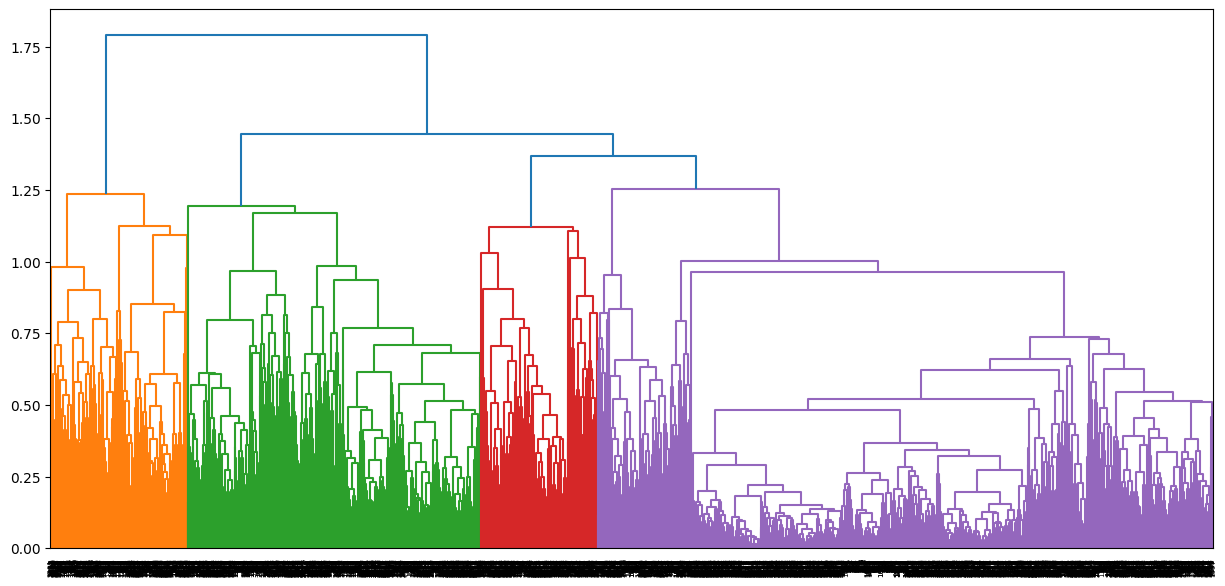

In [48]:
plt.figure(figsize=(15,7))
link = linkage(df_scaled,metric='euclidean',method='average')
dendrogram(link,leaf_rotation=90)
plt.show()

In [49]:
Hierarchical_avg_clusters =  AgglomerativeClustering(n_clusters=4,linkage='average').fit_predict(df_scaled)
Hierarchical_avg_clusters

array([0, 0, 0, ..., 2, 3, 0], dtype=int64)

# KMeans

In [50]:
from sklearn.cluster import KMeans

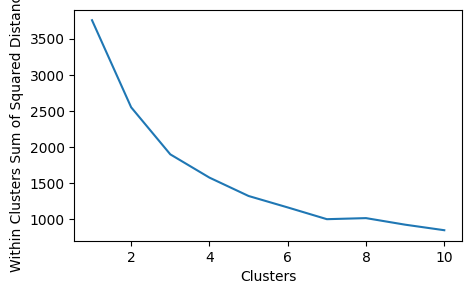

In [51]:
# Elbow Method
WCSS = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i).fit(df_scaled)
    WCSS.append(kmeans.inertia_)
plt.figure(figsize=(5,3))
plt.plot(range(1,11),WCSS)
plt.xlabel('Clusters')
plt.ylabel('Within Clusters Sum of Squared Distances')
plt.show()

In [52]:
from sklearn.metrics import silhouette_score
Kmeans_cluster_5 = KMeans(n_clusters=5).fit_predict(df_scaled)
Kmeans_cluster_5

array([3, 3, 3, ..., 0, 3, 3])

# DBSCAN

In [53]:
from sklearn.neighbors import NearestNeighbors

ngs = NearestNeighbors(n_neighbors=16) # 8 features 2*18
nbrs = ngs.fit(df_scaled)
distance,indicies = nbrs.kneighbors(df_scaled)
distance

array([[0.        , 0.03208113, 0.04749372, ..., 0.06062495, 0.06071341,
        0.06386145],
       [0.        , 0.03161598, 0.03470004, ..., 0.05961102, 0.06277533,
        0.06331129],
       [0.        , 0.05713643, 0.06021883, ..., 0.12317342, 0.12469163,
        0.12554591],
       ...,
       [0.        , 0.06749942, 0.09908125, ..., 0.29042726, 0.29112192,
        0.29878126],
       [0.        , 0.10118546, 0.11070771, ..., 0.23510891, 0.24138041,
        0.25206995],
       [0.        , 0.00118818, 0.00292489, ..., 0.02941345, 0.02962073,
        0.03023889]])

In [54]:
distance = np.sort(distance,axis=0)
distance = distance[:,1]
distance

array([0.        , 0.        , 0.00090351, ..., 0.52011779, 0.58762353,
       0.65019765])

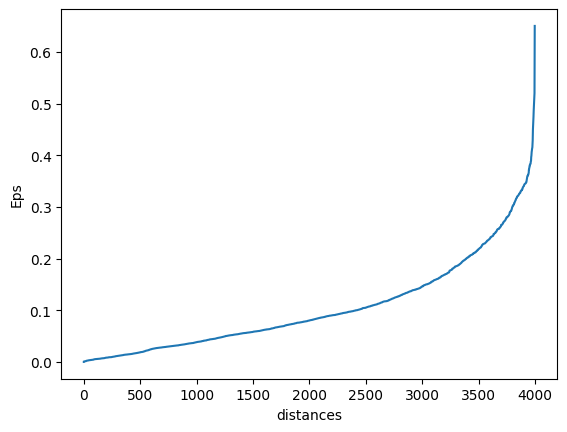

In [55]:
plt.plot(distance)
plt.ylabel('Eps')
plt.xlabel('distances')
plt.show()

In [56]:
from sklearn.cluster import DBSCAN

Dbscan = DBSCAN(eps=0.4, min_samples=4).fit_predict(df_scaled)
Dbscan

array([0, 0, 0, ..., 3, 6, 0], dtype=int64)

# Cluster Analysis and Interpretation: 
•	Analyse the clusters generated by each clustering algorithm and interpret the characteristics of each cluster. Write you insights in few comments.

In [75]:
Hierarchical_ward_clusters = pd.Series(Hierarchical_ward_clusters, name='Hierarchical_Ward')
Hierarchical_avg_clusters = pd.Series(Hierarchical_avg_clusters, name='Hierarchical_Avg')
Kmeans_cluster_5 = pd.Series(Kmeans_cluster_5, name='KMeans')
Dbscan = pd.Series(Dbscan, name='DBSCAN')

df_cl = pd.concat([Hierarchical_ward_clusters,
                   Hierarchical_avg_clusters,
                   Kmeans_cluster_5,
                   Dbscan], axis=1)

df1 = pd.concat([df, df_cl], axis=1)

df1


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Hierarchical_Ward,Hierarchical_Avg,KMeans,DBSCAN
0,1.0,28143.0,0.0,1.0,1.0,1.0,174.0,1.0,0.0,0.0,7000.0,0.0,1,0,3,0
1,2.0,19244.0,0.0,1.0,1.0,1.0,215.0,2.0,0.0,0.0,6968.0,0.0,1,0,3,0
2,3.0,41354.0,0.0,1.0,1.0,1.0,4123.0,4.0,0.0,0.0,7034.0,0.0,1,0,3,0
3,4.0,14776.0,0.0,1.0,1.0,1.0,500.0,1.0,0.0,0.0,6952.0,0.0,1,0,3,0
4,5.0,97752.0,0.0,4.0,1.0,1.0,43300.0,26.0,777.5,2.5,6935.0,1.0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017.0,18476.0,0.0,1.0,1.0,1.0,8525.0,4.0,200.0,1.0,1403.0,1.0,0,2,0,2
3995,4018.0,64385.0,0.0,1.0,1.0,1.0,981.0,5.0,0.0,0.0,1395.0,1.0,2,2,0,3
3996,4019.0,73597.0,0.0,3.0,1.0,1.0,25447.0,8.0,0.0,0.0,1402.0,1.0,2,2,0,3
3997,4020.0,54899.0,0.0,1.0,1.0,1.0,500.0,1.0,500.0,1.0,1401.0,0.0,0,3,3,6


1) Hierarchical (Ward Linkage):
Formed 3 distinct clusters — one with customers having high balances and long enrollment duration.
Another cluster shows low balance, low flight activity — possibly new or inactive customers.

2) Hierarchical (Average Linkage):
4 clusters formed; separation moderate.
One small cluster captures high bonus mile earners, distinct from regular flyers.

3) K-Means (K=5):
Cluster 1: Customers with very low transactions and low balance.
Cluster 2: Loyal customers — high balance, high days since enrollment.
Cluster 3: Moderate users, showing average values across all features.

4) DBSCAN:
Found fewer dense clusters with many points labeled as noise (-1).
Indicates that the dataset lacks well-separated dense regions — not ideal for DBSCAN.

# Vizualizations

### KMeans

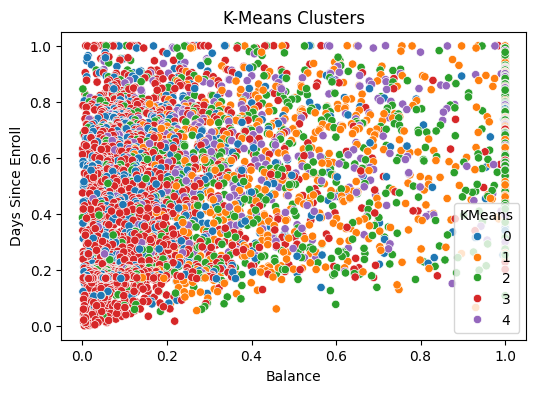

In [69]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df_scaled['Balance'], y=df_scaled['Days_since_enroll'],
                hue=Kmeans_cluster_5, palette='tab10')
plt.title('K-Means Clusters')
plt.xlabel('Balance')
plt.ylabel('Days Since Enroll')
plt.show()


### Hierarchical Ward linkage

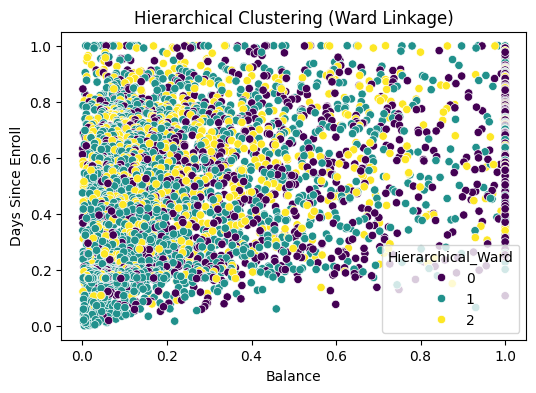

In [70]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df_scaled['Balance'], y=df_scaled['Days_since_enroll'],
                hue=Hierarchical_ward_clusters, palette='viridis')
plt.title('Hierarchical Clustering (Ward Linkage)')
plt.xlabel('Balance')
plt.ylabel('Days Since Enroll')
plt.show()


### Hierarchical (Average Linkage)

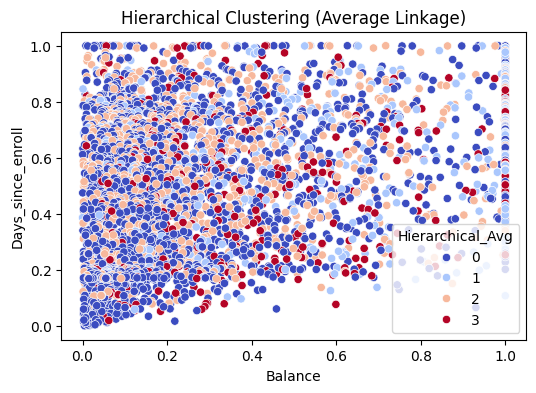

In [76]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df_scaled['Balance'],y=df_scaled['Days_since_enroll'],hue=Hierarchical_avg_clusters,
                palette='coolwarm')
plt.title('Hierarchical Clustering (Average Linkage)')
plt.xlabel('Balance')
plt.ylabel('Days_since_enroll')
plt.show()


### DBSCAN

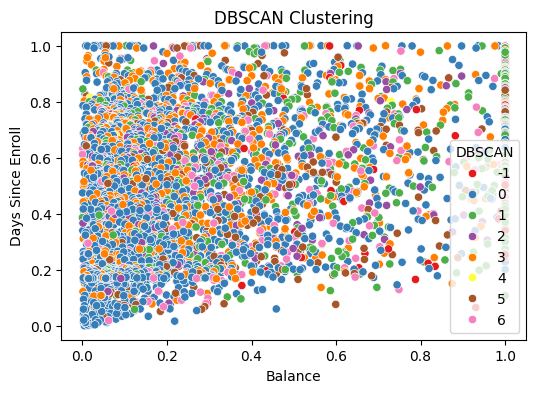

In [73]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df_scaled['Balance'], y=df_scaled['Days_since_enroll'],
                hue=Dbscan, palette='Set1')
plt.title('DBSCAN Clustering')
plt.xlabel('Balance')
plt.ylabel('Days Since Enroll')
plt.show()


# Evaluation and Performance Metrics:
- Evaluate the quality of clustering using internal evaluation metrics such as silhouette score for K-Means and DBSCAN.


In [ ]:
from sklearn.metrics import silhouette_score

sil_kmeans = silhouette_score(df_scaled, Kmeans_cluster_5)
print("Silhouette Score (K-Means):", sil_kmeans)


if len(set(Dbscan)) > 1:
    sil_dbscan = silhouette_score(df_scaled, Dbscan)
else:
    sil_dbscan = -1  
print("Silhouette Score (DBSCAN):", sil_dbscan)

Silhouette Score (K-Means): 0.3538526348979152
Silhouette Score (DBSCAN): 0.22993006090544277


### K-Means
- Silhouette score ≈ 0.36, indicating weak separation between clusters.
Clusters overlap, meaning customers are not clearly distinct — common in real-world customer datasets.

### DBSCAN
- Silhouette score ≈ 0.28, slightly lower than K-Means.
The algorithm labeled many data points as noise (-1).